In [1]:
%matplotlib inline
from IPython.display import display, HTML
from analysis import Analysis
from models import *
analysis = Analysis('weather', title='03-FeaturesDate_pn', normalize=True, logger=display)
analysis.load_data()

D:\Users\fjd10\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Now setting the features and predictor to just be the avg temperature value.

In [2]:
predictor = 'actual_mean_temp'
analysis.data['year'] = analysis.data['date'].dt.year
analysis.data['month'] = analysis.data['date'].dt.month
analysis.data['day'] = analysis.data['date'].dt.day
features = ['year', 'month', 'day', predictor]
analysis.set_feature_predictor_columns(features, predictor)
analysis.train_test_split()

'Number of train data points: 292'

'Number of test data points: 73'

Set some parameters that are used by some of the models

In [3]:
# The number of days to chunk inputs by
NUM_DAYS = 5

# 
NUM_FEATURES = len(analysis.features)

Going to try each different model.

# Raw Data

Raw Data means that the model simply takes the data as a sequence and no data manipulation is performed.

## ARIMA

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1827.791, BIC=1846.175, Fit time=1.759 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1962.638, BIC=1977.345, Fit time=0.477 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1864.170, BIC=1878.877, Fit time=1.057 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=1829.085, BIC=1851.146, Fit time=2.062 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=1986.101, BIC=2000.808, Fit time=0.624 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=1831.230, BIC=1856.967, Fit time=6.017 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1811.604, BIC=1833.664, Fit time=2.236 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 1, 1, 

'Train Error: 5.07417608657  Num NaN: 0'

'Test Error: 6.38998095112    Num NaN: 0'

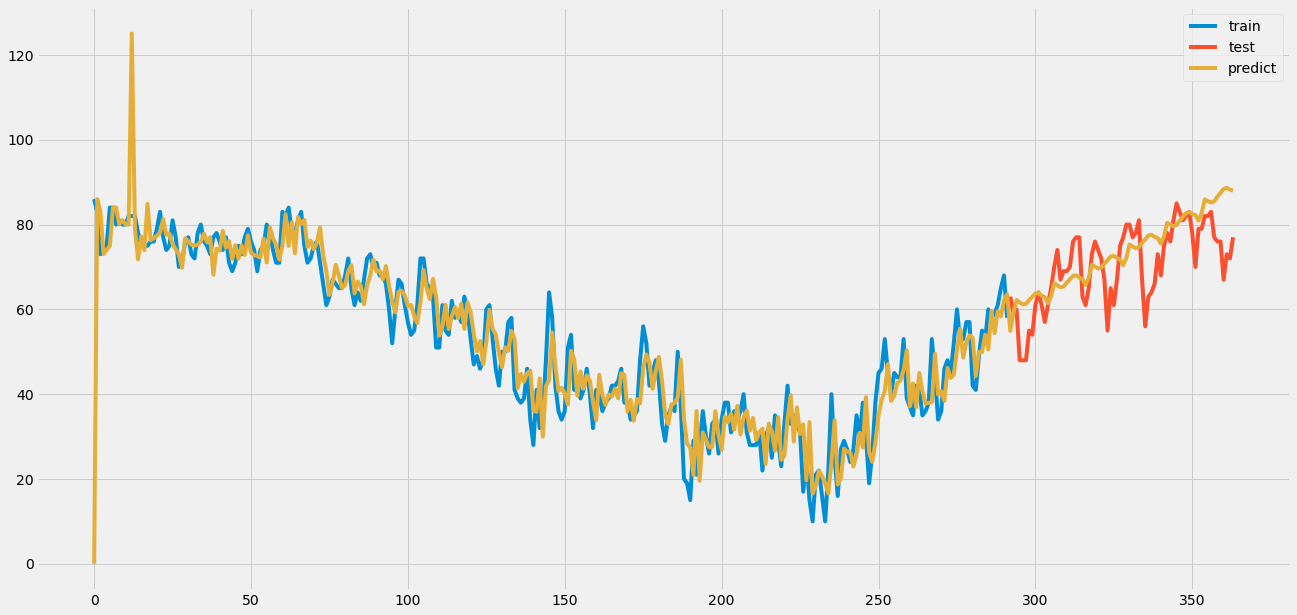

In [4]:
model = ARIMA(analysis, use_features=False)
analysis.run_model(model, name='ARIMA')

'Train Error: 3.90410958904  Num NaN: 0'

'Test Error: 14.5083333333    Num NaN: 0'

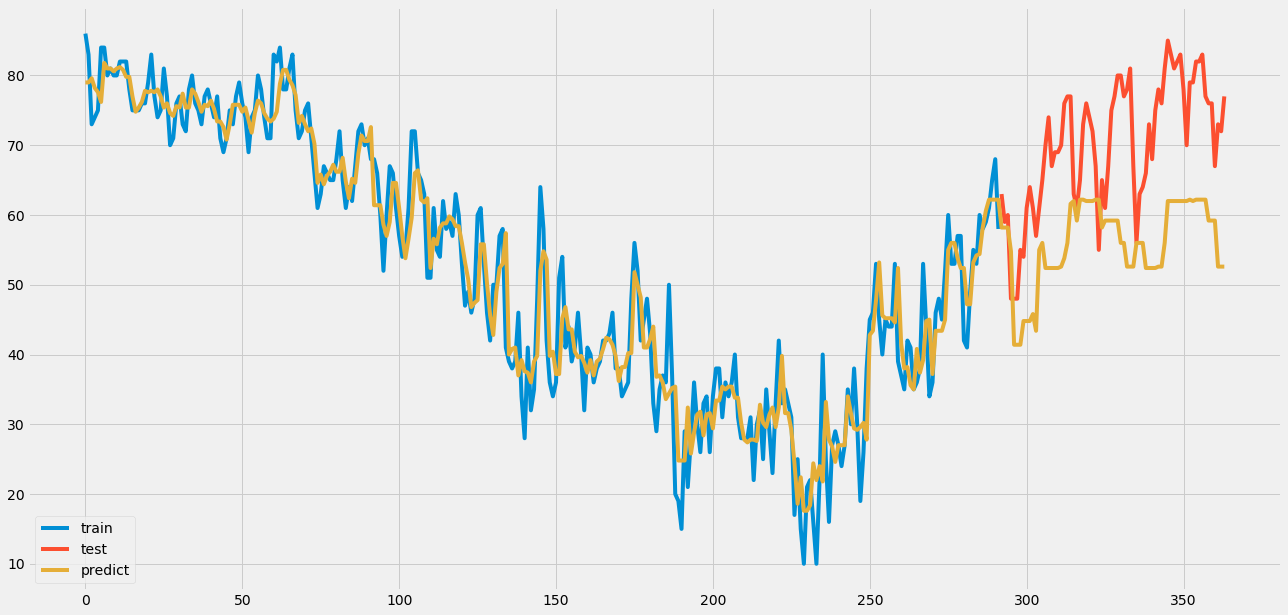

In [5]:
from sklearn.neighbors import KNeighborsRegressor
model = Regressor(analysis, KNeighborsRegressor)
analysis.run_model(model, name='KNN')

D:\Users\fjd10\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


'Train Error: 10.8228698971  Num NaN: 0'

'Test Error: 13.9427581042    Num NaN: 0'

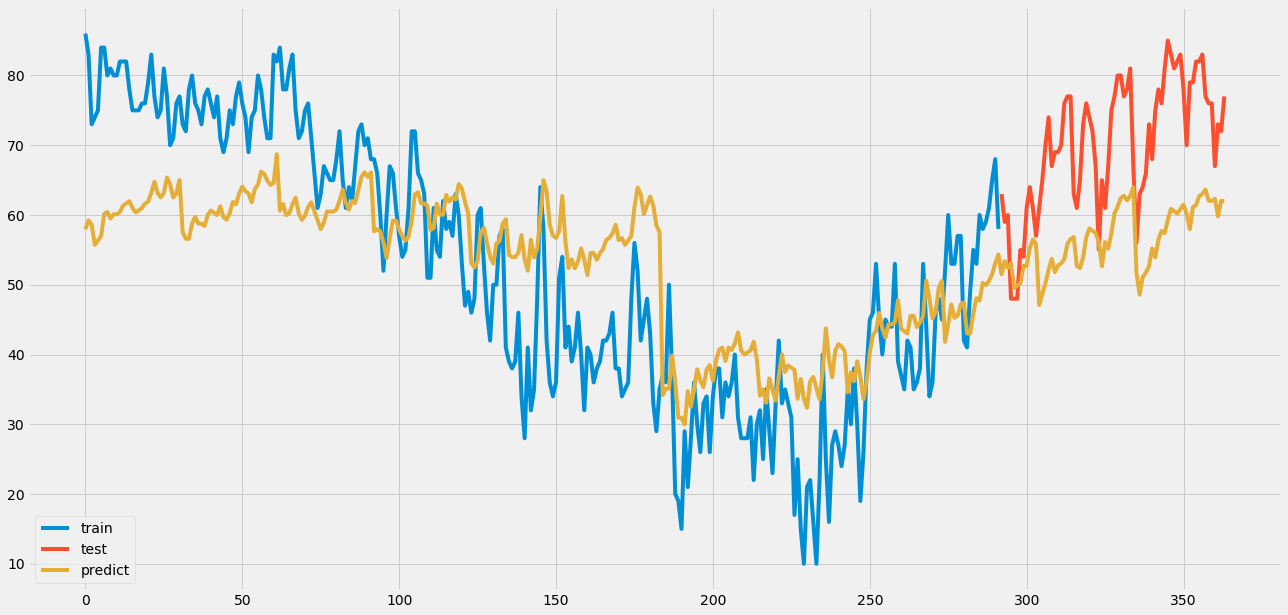

In [6]:
from sklearn.linear_model import SGDRegressor
model = Regressor(analysis, SGDRegressor)
analysis.run_model(model, name='SGD')

'Train Error: 2.07910958904  Num NaN: 0'

'Test Error: 4.80555555556    Num NaN: 0'

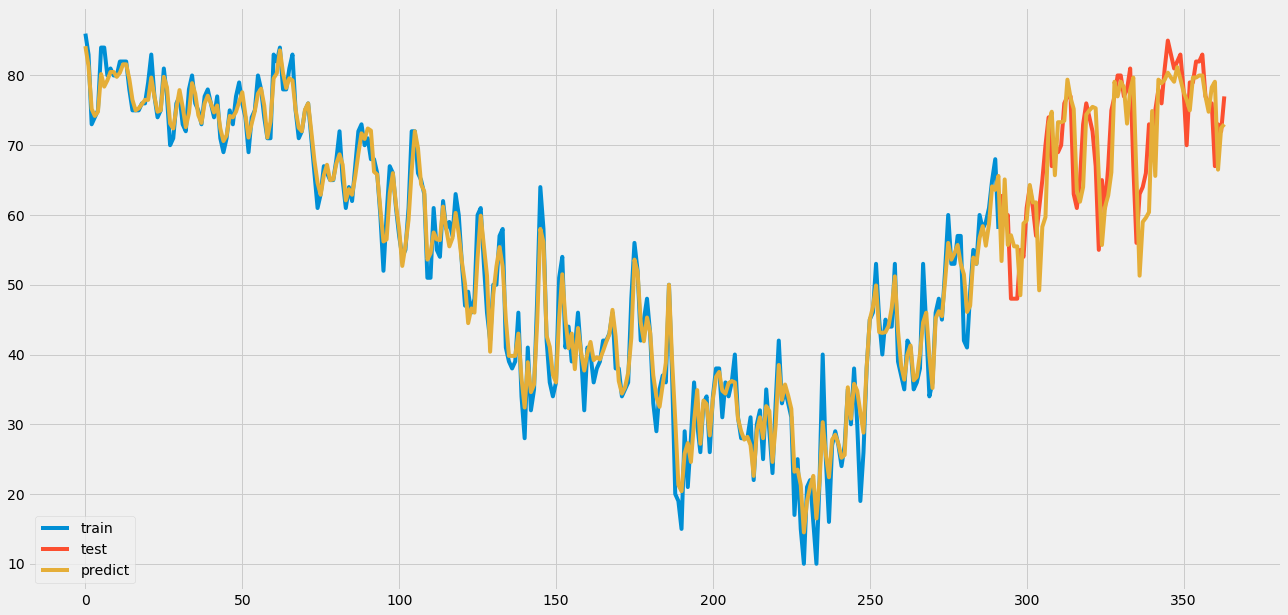

In [7]:
from sklearn.ensemble import RandomForestRegressor
model = Regressor(analysis, RandomForestRegressor)
analysis.run_model(model, name='RandomForest')

'Train Error: 4.50797423921  Num NaN: 0'

'Test Error: 4.76209943591    Num NaN: 0'

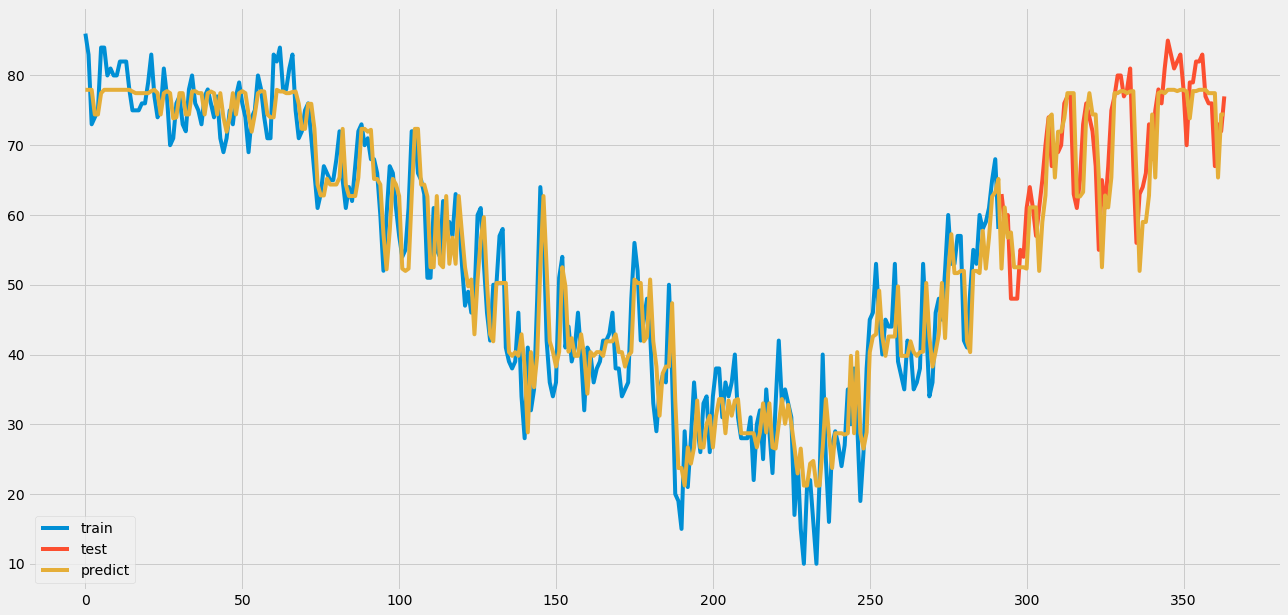

In [8]:
from sklearn.ensemble import AdaBoostRegressor
model = Regressor(analysis, AdaBoostRegressor)
analysis.run_model(model, name='AdaBoost')

'Train Error: 3.26525101596  Num NaN: 0'

'Test Error: 141.828246646    Num NaN: 0'

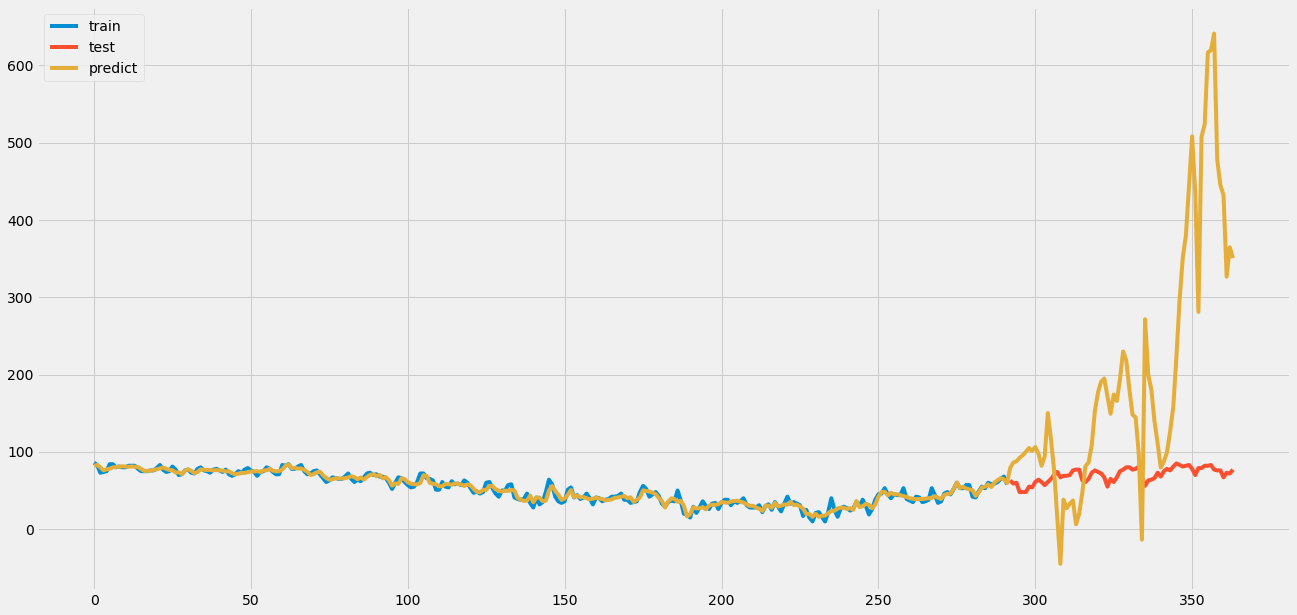

In [9]:
from sklearn.gaussian_process import GaussianProcessRegressor
model = Regressor(analysis, GaussianProcessRegressor)
analysis.run_model(model, name='GaussianProcess')

# Chunking Data

Now going to use models that require chunking.  We perform chunking by taking the time series:

x = (x0, x1, x2, x3, ...)
y = (x1, x2, x3, x4, ...)

and modifying it such that if the chunk parameter, c, is set to 3:

x = ((x0, x1, x2), (x1, x2, x3), (x2, x3, x4), ...)
y = (x3, x4, x5, ...)

This results in the first c values in not having a prediction and thus (Num NaN is > 0 and == c).



## LinearRegression

'Train Error: 5.50764140048  Num NaN: 5'

'Test Error: 6.72045814312    Num NaN: 5'

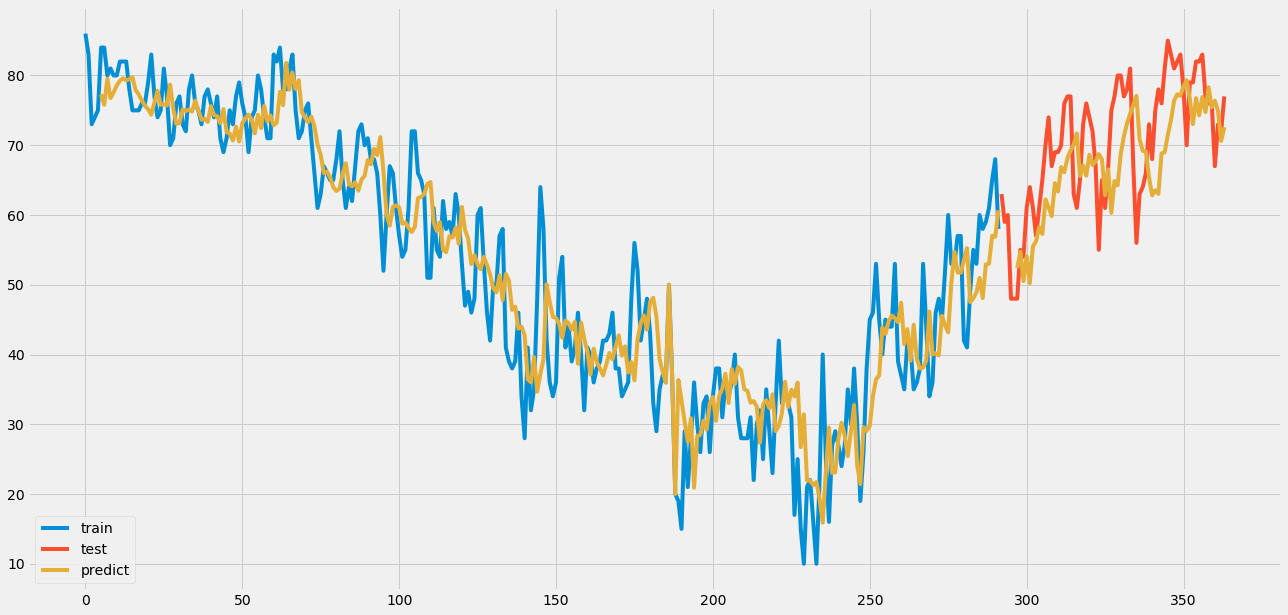

In [10]:
model = LinearRegression(analysis, num_days=NUM_DAYS)
analysis.run_model(model, name='LinearRegression')

## FeedForward Neural Network

Using TensorFlow backend.


Train on 287 samples, validate on 67 samples
Epoch 1/10
 - 1s - loss: 0.1695 - val_loss: 0.1019
Epoch 2/10
 - 0s - loss: 0.1173 - val_loss: 0.1055
Epoch 3/10
 - 0s - loss: 0.1100 - val_loss: 0.0955
Epoch 4/10
 - 0s - loss: 0.1049 - val_loss: 0.0911
Epoch 5/10
 - 0s - loss: 0.1031 - val_loss: 0.1072
Epoch 6/10
 - 0s - loss: 0.0999 - val_loss: 0.1156
Epoch 7/10
 - 0s - loss: 0.0956 - val_loss: 0.1023
Epoch 8/10
 - 0s - loss: 0.0956 - val_loss: 0.0978
Epoch 9/10
 - 0s - loss: 0.0941 - val_loss: 0.0983
Epoch 10/10
 - 0s - loss: 0.0928 - val_loss: 0.1294


'Train Error: 7.36175005777  Num NaN: 5'

'Test Error: 9.70715394661    Num NaN: 5'

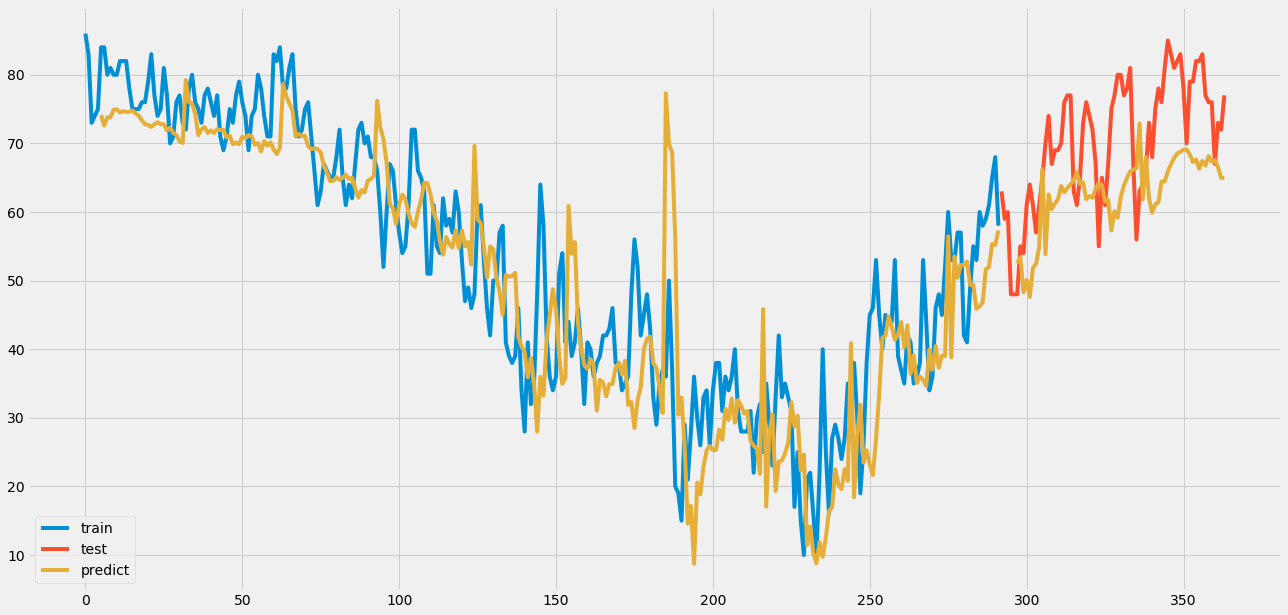

In [11]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

nn = Sequential()
nn.add(layers.Dense(25, activation='tanh',
                    batch_input_shape=(None, NUM_DAYS * NUM_FEATURES)))
nn.add(layers.Dense(10, activation='tanh'))
nn.add(layers.Dense(1, activation='tanh'))
nn.compile(loss='mae', optimizer='sgd')

model = FNN(analysis, nn, num_days=NUM_DAYS)
analysis.run_model(model, name='FNN')


## Recurrent Neural Network with Single Output

Single output means that the chunked timesteps are input and then the final output of the RNN is used as the prediction.

Train on 287 samples, validate on 67 samples
Epoch 1/10
 - 1s - loss: 0.2594 - val_loss: 0.2077
Epoch 2/10
 - 0s - loss: 0.2433 - val_loss: 0.3636
Epoch 3/10
 - 0s - loss: 0.2395 - val_loss: 0.3048
Epoch 4/10
 - 0s - loss: 0.2414 - val_loss: 0.1587
Epoch 5/10
 - 0s - loss: 0.2396 - val_loss: 0.2218
Epoch 6/10
 - 0s - loss: 0.2352 - val_loss: 0.3128
Epoch 7/10
 - 0s - loss: 0.2357 - val_loss: 0.3347
Epoch 8/10
 - 0s - loss: 0.2303 - val_loss: 0.4058
Epoch 9/10
 - 0s - loss: 0.2356 - val_loss: 0.5358
Epoch 10/10
 - 0s - loss: 0.2433 - val_loss: 0.2821


'Train Error: 16.4512837373  Num NaN: 5'

'Test Error: 21.1577020901    Num NaN: 5'

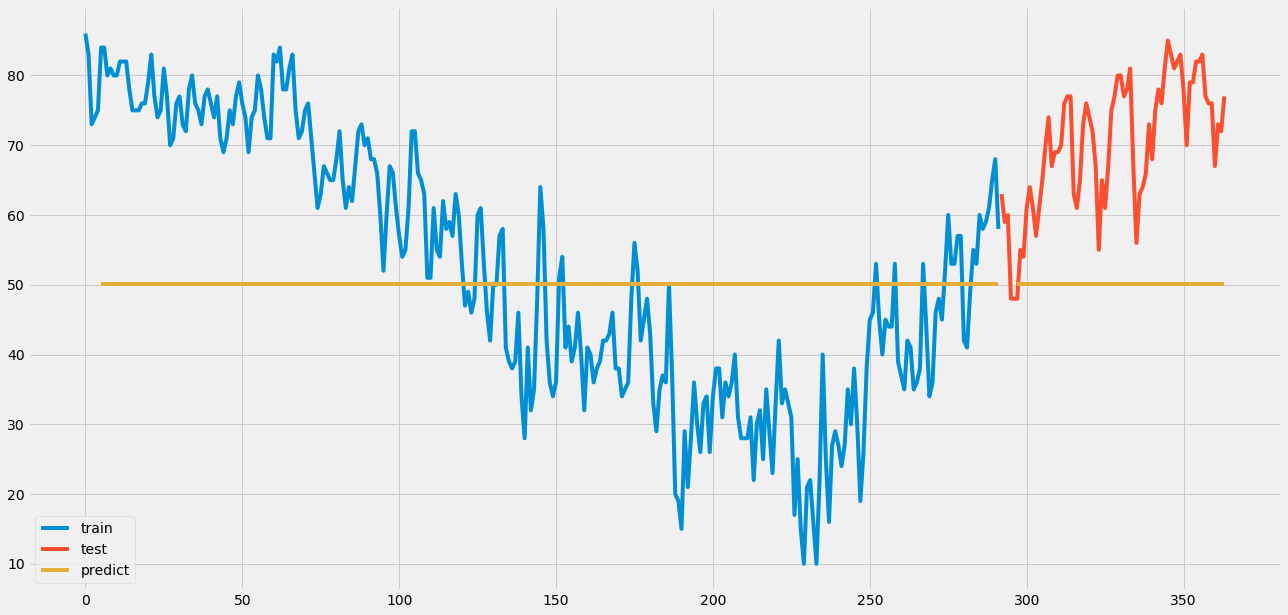

In [12]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

mask_value = -9999

nn = Sequential()
nn.add(layers.Masking(mask_value=mask_value, input_shape=(NUM_DAYS, NUM_FEATURES)))
nn.add(layers.SimpleRNN(50, input_shape=(NUM_DAYS, NUM_FEATURES)))

nn.add(layers.Dense(1, activation='tanh'))
nn.add(layers.Dense(1, activation='linear'))
nn.compile(loss='mae', optimizer=optimizers.RMSprop(lr=0.1))
        
model = RNNSingle(analysis, nn, num_days=NUM_DAYS, mask_value=mask_value)
analysis.run_model(model, name='RNNSingle')

## Recurrent Neural Network with Multiple Outputs

Multiple outputs means that the chunked data is input and the output at each timestep is used.

Train on 59 samples, validate on 15 samples
Epoch 1/10
 - 1s - loss: 0.9079 - val_loss: 0.8338
Epoch 2/10
 - 0s - loss: 0.7761 - val_loss: 0.6736
Epoch 3/10
 - 0s - loss: 0.6273 - val_loss: 0.4854
Epoch 4/10
 - 0s - loss: 0.4661 - val_loss: 0.3439
Epoch 5/10
 - 0s - loss: 0.3475 - val_loss: 0.2560
Epoch 6/10
 - 0s - loss: 0.2697 - val_loss: 0.1999
Epoch 7/10
 - 0s - loss: 0.2167 - val_loss: 0.1613
Epoch 8/10
 - 0s - loss: 0.1787 - val_loss: 0.1320
Epoch 9/10
 - 0s - loss: 0.1492 - val_loss: 0.1088
Epoch 10/10
 - 0s - loss: 0.1252 - val_loss: 0.0893


'Train Error: 1136.53111859  Num NaN: 0'

'Test Error: 900.777340955    Num NaN: 0'

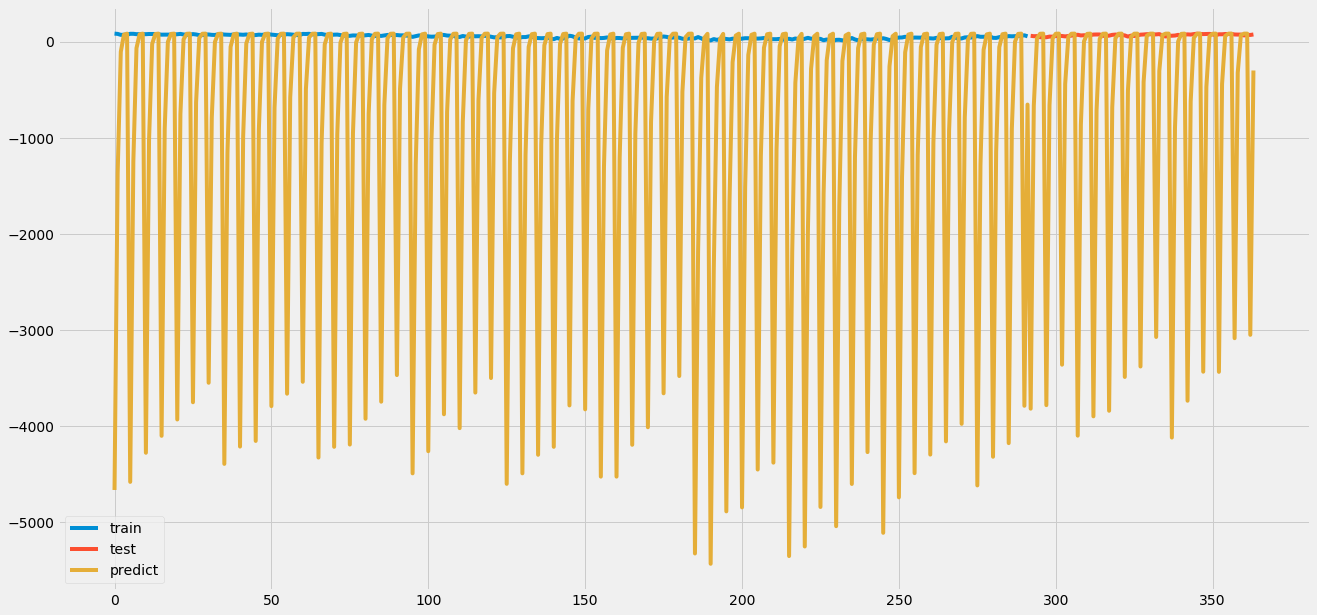

In [13]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

mask_value = -9999

nn = Sequential()
nn.add(layers.Masking(mask_value=mask_value, input_shape=(NUM_DAYS, NUM_FEATURES)))
nn.add(layers.LSTM(50, activation='tanh', input_shape=(NUM_DAYS, NUM_FEATURES), return_sequences=True))

nn.add(layers.TimeDistributed(layers.Dense(10, activation='relu')))
nn.add(layers.TimeDistributed(layers.Dense(1, activation='tanh')))
# nn.add(layers.TimeDistributed(layers.Dense(1, activation='linear')))
nn.compile(loss='mae', optimizer='rmsprop')

model = RNNMultiple(analysis, nn, num_days=NUM_DAYS, mask_value=mask_value)
analysis.run_model(model, name='RNNMultiple')

## Recurrent Neural Network Complete Sequence

Complete sequence means that the entire sequence is input into the network and each timestep produces an output.  There are no batches, just one long sequence.

D:\Users\fjd10\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Train on 1 samples, validate on 1 samples
Epoch 1/10
 - 2s - loss: 1.0395 - val_loss: 0.9133
Epoch 2/10
 - 1s - loss: 0.9094 - val_loss: 0.7863
Epoch 3/10
 - 1s - loss: 0.7877 - val_loss: 0.6685
Epoch 4/10
 - 1s - loss: 0.6665 - val_loss: 0.5396
Epoch 5/10
 - 1s - loss: 0.5230 - val_loss: 0.4019
Epoch 6/10
 - 1s - loss: 0.3867 - val_loss: 0.2710
Epoch 7/10
 - 1s - loss: 0.2578 - val_loss: 0.1770
Epoch 8/10
 - 1s - loss: 0.1574 - val_loss: 0.1215
Epoch 9/10
 - 1s - loss: 0.0899 - val_loss: 0.0931
Epoch 10/10
 - 1s - loss: 0.0525 - val_loss: 0.0795


'Train Error: 353.695503731  Num NaN: 0'

'Test Error: 801.534336368    Num NaN: 0'

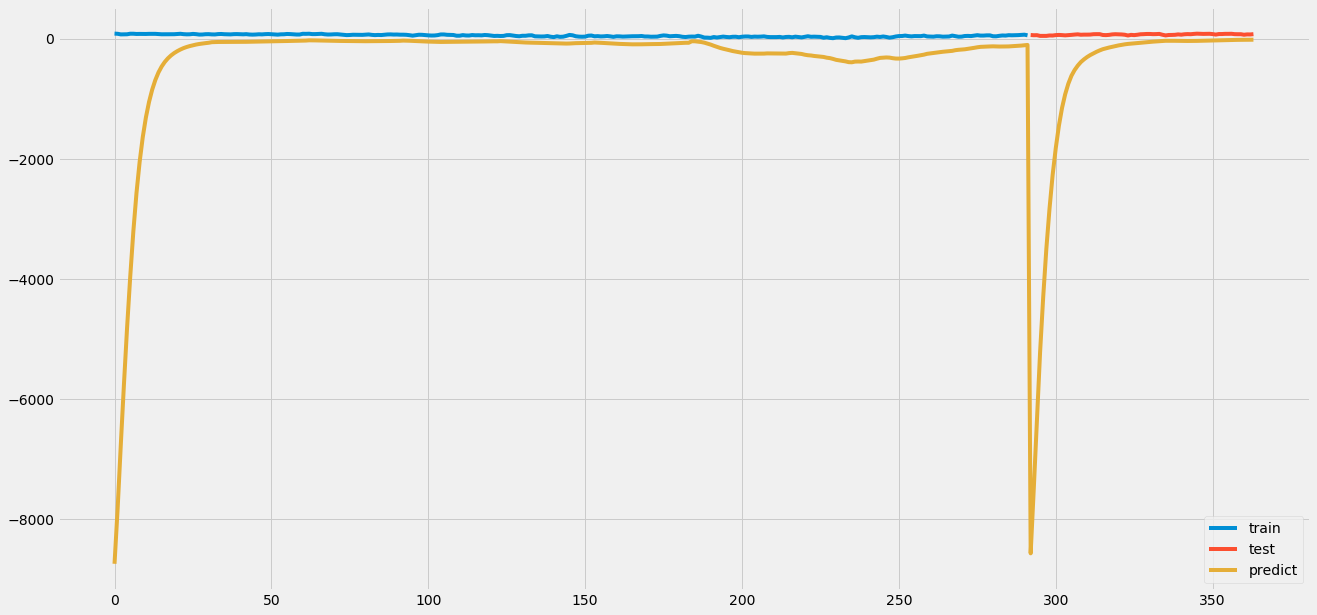

In [14]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

mask_value = -9999

nn = Sequential()
nn.add(layers.Masking(mask_value=mask_value, input_shape=(len(analysis.x_train), NUM_FEATURES)))
nn.add(layers.LSTM(50, activation='tanh', input_shape=(len(analysis.x_train), NUM_FEATURES), return_sequences=True))

nn.add(layers.TimeDistributed(layers.Dense(10, activation='relu')))
nn.add(layers.TimeDistributed(layers.Dense(1, activation='tanh')))
# nn.add(layers.TimeDistributed(layers.Dense(1, activation='linear')))
nn.compile(loss='mae', optimizer='rmsprop')

model = RNNAll(analysis, nn, mask_value=mask_value)
analysis.run_model(model, name='RNNAll')